# <center> 11.CNN-绘制网络结构 </center>

In [1]:
# 尝试在竞争对手中的前10%，只需要多走一步
import numpy as np
from keras.datasets import mnist  # 手写数字识别
from keras.utils import np_utils # keras中numpy工具包
from keras.models import Sequential
# 二维卷积 数据池化  数据扁平化(reshape)
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, Dropout
from keras.optimizers import Adam  # 优化器

In [2]:
# 载入数据
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# (60000,28,28) --> (60000, 28,28,1)  图片的深度(1表示黑白图片，3表示彩色图片的深度)
x_train = x_train.reshape(-1, 28,28,1) / 255.0 # -1自动计算
x_test = x_test.reshape(-1, 28,28,1) / 255.0 # 数据值是0-255，进行归一化

# 换为one-hot格式
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [3]:
# 定义顺序模型
model = Sequential()

# 第一个卷积层
# input_shape 输入数据的形状(平面)，只要在第一层进行设置
"""
    filters, 卷积核/滤波器的个数
    kernel_size, 卷积核
    strides=(1, 1),  步长
    padding='valid',  填充方式
    data_format=None,
    dilation_rate=(1, 1),
    activation=None,  激活函数
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
"""
model.add(
    Convolution2D(
        input_shape = (28,28,1),
        filters = 32,
        kernel_size = 5,
        strides=1,
        padding='same',
        activation='relu'
    )
)


# 第一个池化层:不需要输入形状 28*28 --> 28*28（same填充方式）
model.add(
    MaxPooling2D(
        pool_size=2,
        strides=2,
        padding='same',
    )
)

# 第二个卷积层 池化之后 28/2  28*28--> 14*14
model.add(Convolution2D(64,5, strides=1, padding='same', activation='relu'))

# 第二个池化层  14*14
model.add(MaxPooling2D(2,2,'same'))

# 把第二个池化层的输出扁平化为一维   7*7
model.add(Flatten()) # 7*7  --> 64*7*7

# 第一个全连接层 
model.add(Dense(1024, activation='relu'))

# Dropout防止过拟合
model.add(Dropout(0.5))

# 第2个全连接层
model.add(Dense(10, activation='softmax'))

# 定义优化器  loss 交叉熵
adam = Adam(lr=1e-4)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
# 训练模型
model.fit(x_train, y_train, batch_size=64, epochs=10)

# 评估模型
loss, accuracy = model.evaluate(x_test, y_test)
print('test loss: ', loss)
print('test accuracy: ', accuracy)

loss, accuracy = model.evaluate(x_train, y_train)
print('train loss: ', loss)
print('train accuracy: ', accuracy)

Epoch 1/10
60000/60000 [==============================] - 375s 6ms/step - loss: 0.3199 - accuracy: 0.9105
Epoch 2/10
60000/60000 [==============================] - 379s 6ms/step - loss: 0.0900 - accuracy: 0.9725
Epoch 3/10
60000/60000 [==============================] - 397s 7ms/step - loss: 0.0633 - accuracy: 0.9804
Epoch 4/10
60000/60000 [==============================] - 372s 6ms/step - loss: 0.0503 - accuracy: 0.9845
Epoch 5/10
60000/60000 [==============================] - 399s 7ms/step - loss: 0.0416 - accuracy: 0.9875
Epoch 6/10
60000/60000 [==============================] - 388s 6ms/step - loss: 0.0366 - accuracy: 0.9890
Epoch 7/10
60000/60000 [==============================] - 320s 5ms/step - loss: 0.0315 - accuracy: 0.9900
Epoch 8/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.0273 - accuracy: 0.9912
Epoch 9/10
60000/60000 [==============================] - 297s 5ms/step - loss: 0.0235 - accuracy: 0.9927
Epoch 10/10
10000/10000 [=====================

## 绘制网络结构

install pydot and graphviz

- pip install pydot
- graphviz 需要官网安装，然后配置系统环境变量

In [12]:
import matplotlib.pyplot as plt
from keras.utils import plot_model

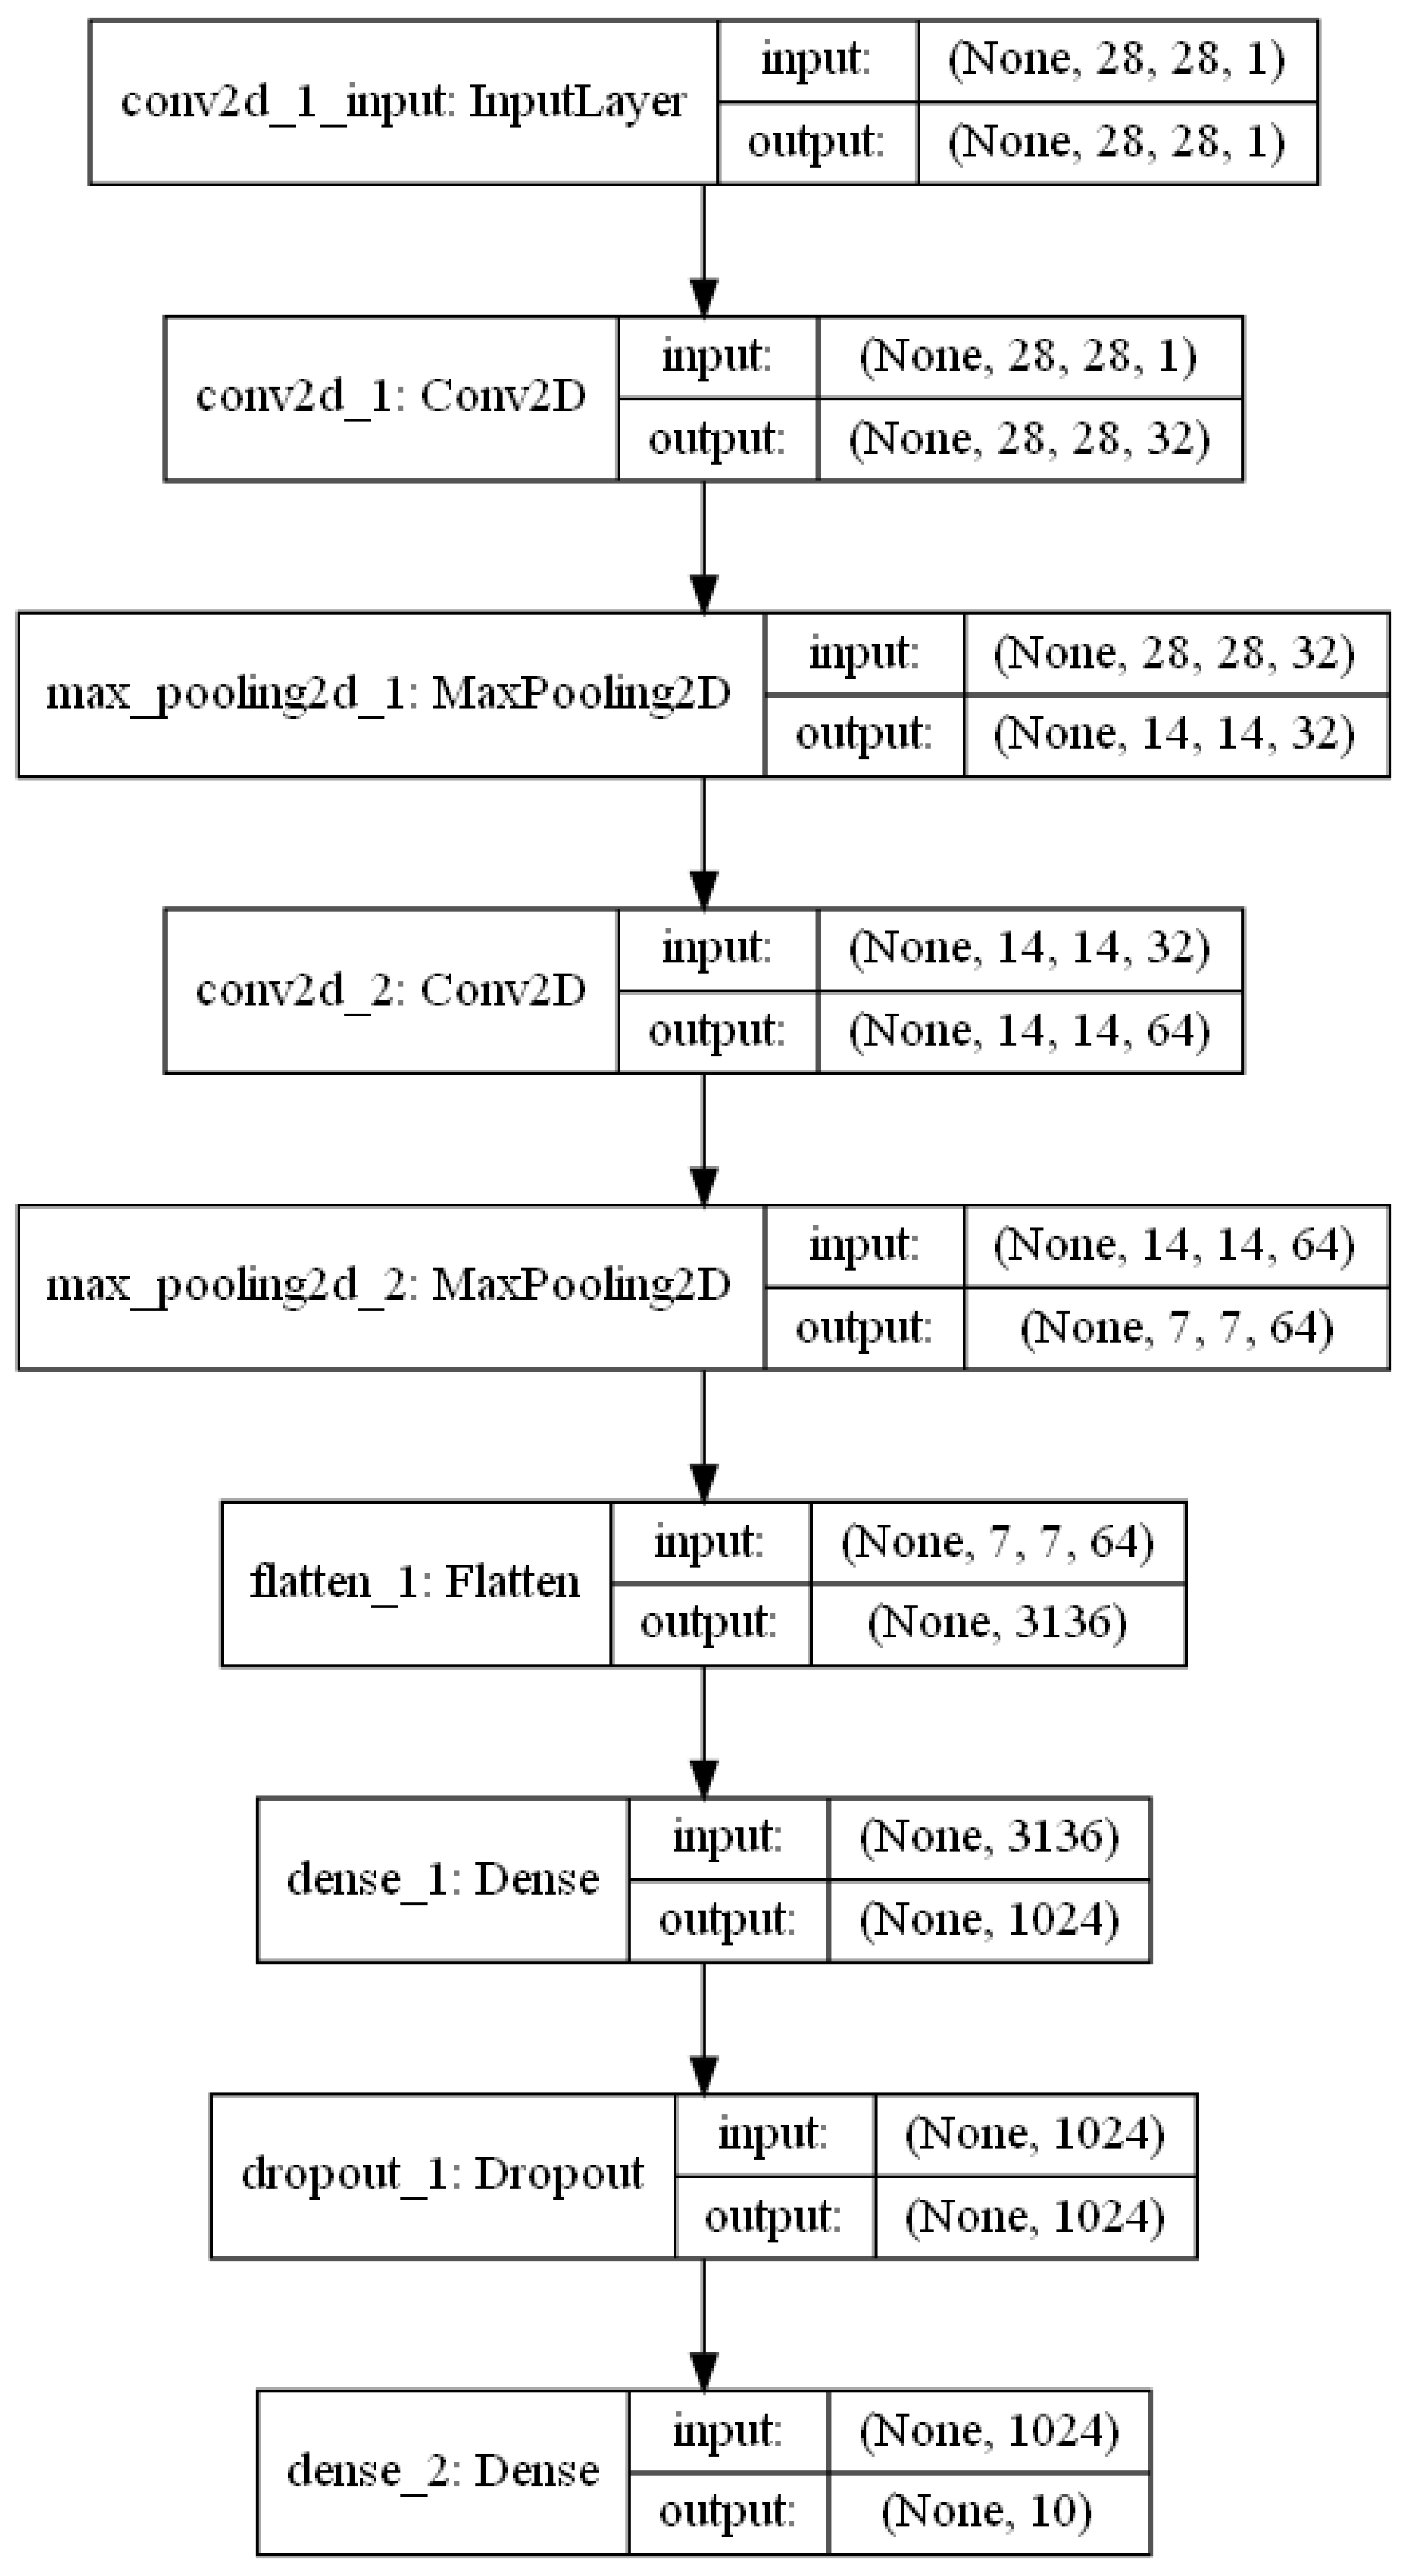

In [18]:
import os  # 系统环境变量失效
os.environ["PATH"] += os.pathsep + 'D:/AppData/graphviz/bin'  # 解决问题


# 绘制模型
plot_model(model,to_file='cnn_model.png', show_shapes=True, show_layer_names='False', rankdir='TB') # LR
plt.figure(figsize=(80,80))
img = plt.imread('cnn_model.png')
plt.imshow(img)
plt.axis('off')
plt.show()